#Flyweight Design Pattern

Flyweight is used to share common parts of objects to save memory when you have lots of similar objects.

#Example1
Example: Drawing Many Circles

Goal:
Many circles of the same color are being drawn.

We want to avoid creating new Circle objects again and again.

We want to draw many circles, some of which share the same color. Instead of creating a new Circle object for every circle drawn (which wastes memory), we reuse existing circle objects with the same color.



In [20]:
#Flyweight class (Circle)
class Circle:
    def __init__(self, color):
        self.color = color  # intrinsic state (shared)

    def draw(self, x, y):
        #print(f"Drawing {self.color} circle at ({x}, {y})")
        print(f"Drawing {self.color} circle at ({x}, {y}) | id: {id(self)}")


Each Circle stores its intrinsic state: the color.

The draw method takes the extrinsic state: the coordinates (x, y) where the circle is drawn.

The intrinsic state is shared, extrinsic is unique per use.

In [21]:
#Flyweight Factory (reuses circle)
class CircleFactory:
    _circles = {} #empty dictionary

    def get_circle(self, color):
        if color not in self._circles:
            self._circles[color] = Circle(color)
            print(f"Created new {color} circle")
        return self._circles[color]


This factory maintains a dictionary _circles mapping colors to existing Circle objects.

When get_circle(color) is called:

If a circle of that color does not exist, create it and store.

Otherwise, reuse the existing one.

This avoids creating multiple circle objects of the same color.

In [22]:
#Client code (uses shared circles)
factory = CircleFactory()

colors = ["red", "green", "red", "green", "red", "blue","blue"]

positions = [(5, 10), (10, 20), (15, 30), (20, 40), (25, 50), (1,2),(1,3)]

for i in range(len(colors)):
    circle = factory.get_circle(colors[i])
    circle.draw(*positions[i])


Created new red circle
Drawing red circle at (5, 10) | id: 135970245572944
Created new green circle
Drawing green circle at (10, 20) | id: 135970246962384
Drawing red circle at (15, 30) | id: 135970245572944
Drawing green circle at (20, 40) | id: 135970246962384
Drawing red circle at (25, 50) | id: 135970245572944
Created new blue circle
Drawing blue circle at (1, 2) | id: 135970245565840
Drawing blue circle at (1, 3) | id: 135970245565840


We have N circles to draw.

Colors repeat: "red", "green", "red" etc.

Positions are unique.

We reuse circles for "red" and "green" colors instead of creating new ones.



The first time a color appears, a new Circle object is created.

Next times the same color is requested, the factory returns the existing object.

The position is passed during draw() call as extrinsic data.



#Repeating the above example by plotting the circles

Created new red circle | id: 135970246540880
Drawing red circle at (5, 10) | id: 135970246540880
Created new green circle | id: 135970245573008
Drawing green circle at (10, 20) | id: 135970245573008
Drawing red circle at (15, 30) | id: 135970246540880
Drawing green circle at (20, 40) | id: 135970245573008
Drawing red circle at (25, 50) | id: 135970246540880
Created new blue circle | id: 135970285659344
Drawing blue circle at (20, 10) | id: 135970285659344
Created new brown circle | id: 135970282878288
Drawing brown circle at (5, 30) | id: 135970282878288


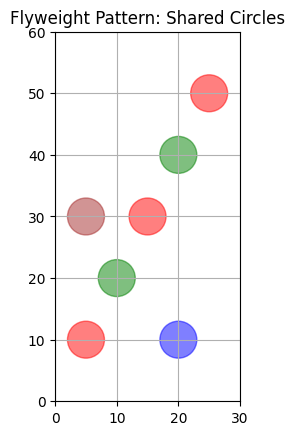

In [24]:
import matplotlib.pyplot as plt

# Flyweight class
class Circle:
    def __init__(self, color):
        self.color = color  # Intrinsic state

    def draw(self, x, y, ax):
        circle = plt.Circle((x, y), radius=3, color=self.color, alpha=0.5)
        ax.add_patch(circle)
        print(f"Drawing {self.color} circle at ({x}, {y}) | id: {id(self)}")


# Flyweight Factory
class CircleFactory:
    _circles = {}

    def get_circle(self, color):
        if color not in self._circles:
            self._circles[color] = Circle(color)
            print(f"Created new {color} circle | id: {id(self._circles[color])}")
        return self._circles[color]

factory = CircleFactory()
colors = ["red", "green", "red", "green", "red", "blue","brown"]
positions = [(5, 10), (10, 20), (15, 30), (20, 40), (25, 50),(20,10),(5,30)]

# Set up matplotlib figure
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(0, 30)
ax.set_ylim(0, 60)
ax.set_title("Flyweight Pattern: Shared Circles")

for i in range(len(colors)):
    circle = factory.get_circle(colors[i])
    circle.draw(positions[i][0], positions[i][1], ax)

plt.grid(True)
plt.show()